# 📖 Introduction 

The goal of this project is to develop a deep learning model that can accurately classify facial expressions into one of two categories: Angry, Happy. We will use convolutional neural networks (CNNs) to train our model, as they have been shown to be effective in image classification tasks. Our approach involves training a CNN model from scratch on the FER-2013 dataset





# 💾 Data





<table>
    <tr>
        <td><img src="https://i.ibb.co/B394D0t/12.png" width="100%" height="100%"></td>
        <td><img src="https://i.ibb.co/5xV8MZj/40.png" width="100%" height="100%"></td>
        <td><img src="https://i.ibb.co/bFgXc43/19.png" width="100%" height="100%"></td>
    </tr>
</table>
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:

| Binary Classification |

| categories  | emotion  |
|:---:|:--:|
| 0  | Angry emotion |
| 1  | Happy emotion |



We define a simple CNN model and compare the predicted results with ge given labels.


The FER-2013 dataset consists of 48x48 pixel grayscale images of faces that have been automatically registered to be centred and occupy a similar amount of space in each image. The dataset contains 24,400 images, with 22,968 examples in the training set and 1,432 examples in the test set.But we have taken 2 emotions so have around 12000 images divide into train and validation dataset

# 🛠 Preprocessing

In this section, we will be using both data generators and data augmentation to train a deep learning model for human emotion detection using the FER-2013 dataset. Due to the size and complexity of the dataset, it would be impractical to load all of the images into memory at once. Therefore, we will be using data generators to generate batches of images on-the-fly during training, which will allow us to efficiently train our model on the entire dataset.

In addition, we will be applying various data augmentation techniques to the training images, such as rotation, shifting, and flipping. This will help to increase the size and diversity of our training set, which can improve the performance of our deep learning model. By introducing variability into the training process, data augmentation can also help to prevent overfitting, which occurs when the model becomes too closely tailored to the training set and performs poorly on new, unseen data.

Importing Libraries

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/PGA Data Analytics and Machine Learning/PGA 3.0 Content Creation/DL /CNN, Computer Vision/PGA WD/WD Project/Emotion Recognition with Image Dataset/dataset/images/train" # Directory containing the training data
test_dir = "/content/drive/MyDrive/PGA Data Analytics and Machine Learning/PGA 3.0 Content Creation/DL /CNN, Computer Vision/PGA WD/WD Project/Emotion Recognition with Image Dataset/dataset/images/validation"  # Directory containing the validation data

# Image Preprocessing with ImageDataGenerator
(for image data augmentation and validation data rescaling.)

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

#Image Data Generators for Training and Validation

### Set the Directory
##### "YOUR FILE PATH" is the local path of your machine where you have set up your folders for training and test sets.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 8927 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


Visualizations


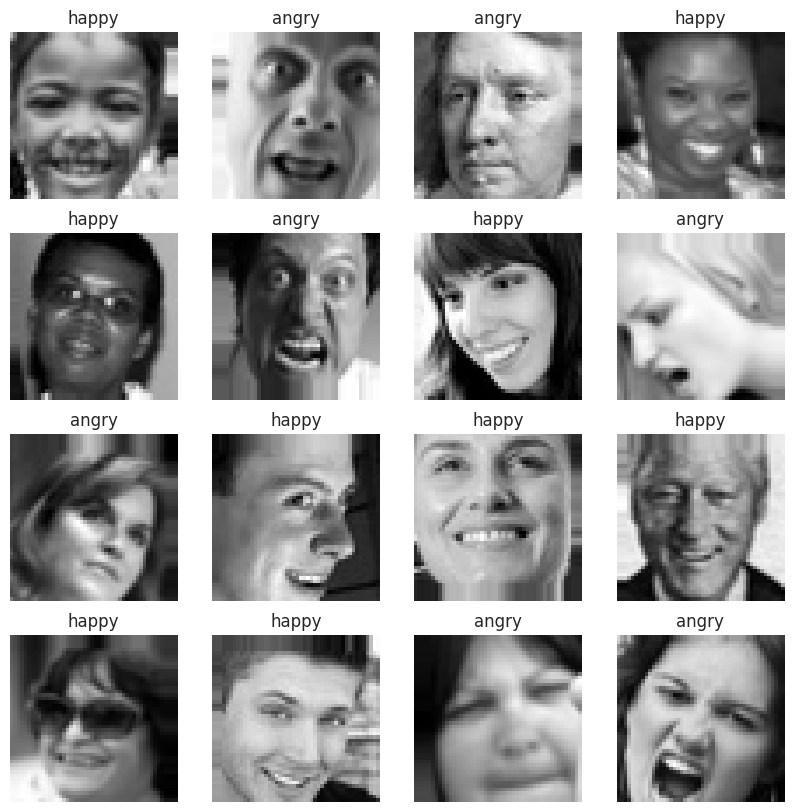

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the generator
batch = next(train_generator)

# Display the images in a 4x4 grid with their corresponding labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap='gray') # display the image at index i of the batch on the current axis
    label_idx = batch[1][i].argmax() # get the index of the label for the image at index i of the batch
    label_map = {v:k for k,v in train_generator.class_indices.items()} # create a dictionary mapping the label index to the corresponding label name
    ax.set_title(label_map[label_idx]) # set the title of the current axis to the label name corresponding to the label index
    ax.axis('off') # turn off the axis ticks and labels
    
plt.show() # display the figure


# Modeling 

## CNN Model

To develop the CNN architecture, we will begin by defining the input layer and the number of filters in the first convolutional layer. Then, we will add additional convolutional layers with increasing numbers of filters, followed by max-pooling layers to reduce the spatial dimensions of the feature maps. After the convolutional layers, we will add fully connected layers with ReLU activation to classify the emotions.

We will experiment with different numbers of convolutional layers, filter sizes, and fully connected layers to optimize the model performance. Additionally, we will use techniques such as dropout and batch normalization to prevent overfitting and improve the generalization capability of the model.

In [ ]:

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 


# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(64, activation='relu'))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(2, activation='sigmoid'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback to save the model's weights
# The filepath specifies where the weights should be saved
# The monitor argument specifies the metric to monitor for saving the best weights
# The save_best_only argument ensures that only the weights with the highest monitored metric value are saved
# The save_weights_only argument specifies to only save the weights (not the entire model)
# The mode argument specifies whether to maximize or minimize the monitored metric value (in this case, 'max' for accuracy)
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
# The batch_size specifies the number of samples per gradient update
# The epochs specifies the number of times to iterate over the entire training dataset
# The validation_data specifies the data to use for validation during training
# The callbacks argument specifies the callbacks to use during training (in this case, just the ModelCheckpoint callback)
history = model.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)


Epoch 1/10
140/140 [==============================] - ETA: 0s - loss: 0.8275 - accuracy: 0.6330
Epoch 1: val_accuracy improved from -inf to 0.65530, saving model to model_weights.h5
140/140 [==============================] - 205s 1s/step - loss: 0.8275 - accuracy: 0.6330 - val_loss: 7.8576 - val_accuracy: 0.6553
Epoch 2/10
140/140 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.6828
Epoch 2: val_accuracy did not improve from 0.65530
140/140 [==============================] - 21s 147ms/step - loss: 0.5791 - accuracy: 0.6828 - val_loss: 16.6969 - val_accuracy: 0.6553
Epoch 3/10
140/140 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7224
Epoch 3: val_accuracy did not improve from 0.65530
140/140 [==============================] - 21s 148ms/step - loss: 0.5372 - accuracy: 0.7224 - val_loss: 14.9707 - val_accuracy: 0.6553
Epoch 4/10
140/140 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.7485
Epoch 4: val_accuracy impr

## Evaluation

In [ ]:
# Generate generalization metrics
validation_loss, validation_acc = model.evaluate_generator(validation_generator)
print('Validation loss:', validation_loss, '\t Validation accuracy:', validation_acc)

<ipython-input-26-e0621431fd30>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, validation_acc = model.evaluate_generator(validation_generator)


Validation loss: 0.3442072570323944 	 Validation accuracy: 0.8276481032371521


### Training and validation loss curves

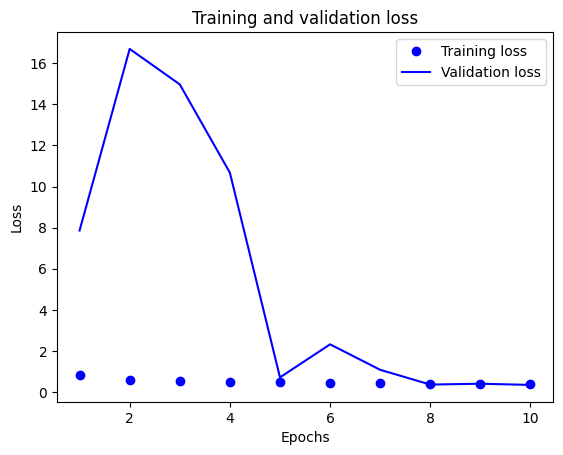

In [ ]:
# Plot the train and validation loss

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and validation accuracy curves

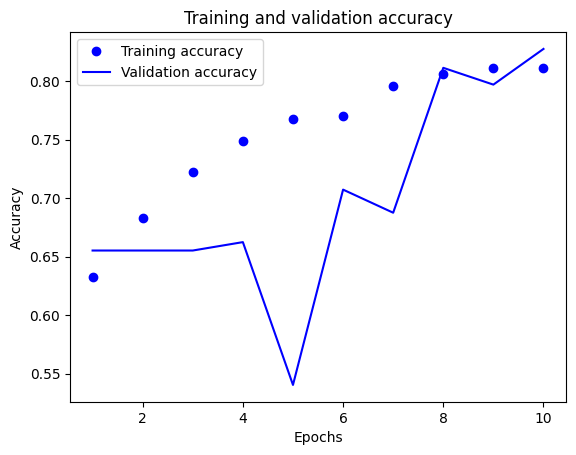

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix

9/9 [==============================] - 1s 108ms/step


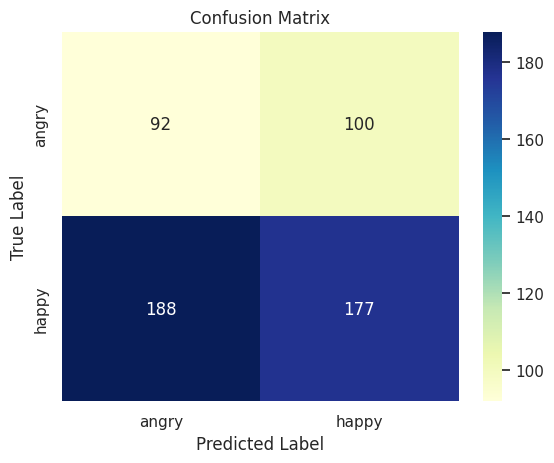

In [ ]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Load an image to predict
img_path = "/content/drive/MyDrive/PGA Data Analytics and Machine Learning/PGA 3.0 Content Creation/DL /CNN, Computer Vision/PGA WD/WD Project/Emotion Recognition with Image Dataset/dataset/images/Total_dataset/23.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Load image and resize it to (48, 48) and convert it to grayscale
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to the array to make it suitable for model input
img_array /= 255.  # Normalize the pixel values between 0 and 1

# Make a prediction
prediction = model.predict(img_array)  # Predict the emotion label for the image

# Get the predicted label
label_map = {v:k for k,v in train_generator.class_indices.items()}  # Map the class indices to the corresponding emotion labels
predicted_label = label_map[np.argmax(prediction)]  # Get the emotion label with the highest predicted probability
print(" Emotion predicted of this image is", predicted_label)  # Print the predicted emotion label



1/1 [==============================] - 0s 87ms/step
 Emotion predicted of this image is angry


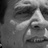

In [ ]:
img